In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Lecture 6

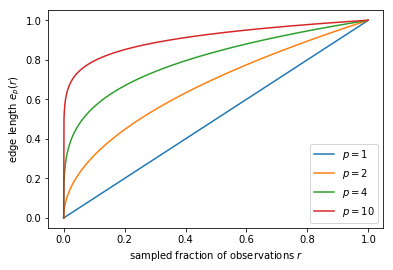

In [14]:
rs = np.arange(0,1,0.001)
def e(p, r):
    return r**(1./p)
for p in (1, 2, 4, 10):
    plt.plot(rs, e(p, rs), label=r'$p = {}$'.format(p))
plt.xlabel('sampled fraction of observations $r$')
plt.ylabel('edge length $e_p(r)$')
plt.legend()
plt.savefig('../05-linreg/img/ep.png', dpi=300)

In [24]:
from scipy.stats import t, norm

In [25]:
norm.pdf(2, 0, 1)

0.053990966513188063

In [17]:
t.pdf(1, 100)

0.24076589692855324

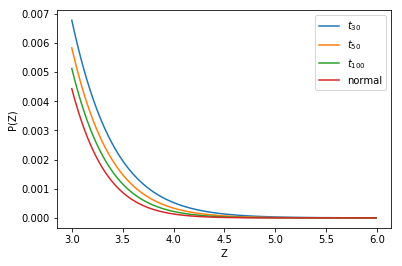

In [52]:
zs = np.arange(3,6,.01)
dofs = (30, 50, 100)
for d in dofs:
    plt.plot(zs, t.pdf(zs, d), label="$t_{{{}}}$".format(d))
plt.plot(zs, norm.pdf(zs, 0, 1), label="normal")
plt.legend()
plt.xlabel("Z")
plt.ylabel("P(Z)")
plt.savefig("../05-linreg/img/tails.png", dpi=300)

In [47]:
fig_size = plt.rcParams['figure.figsize']

In [53]:
plt.rcParams['figure.figsize'] = [5,5]

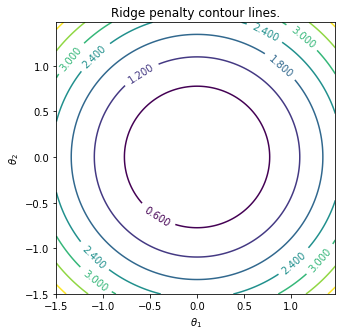

In [68]:
delta = 0.025
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
z_ridge = [i**2 + j**2 for i,j in zip(X,Y)]
cs = plt.contour(X, Y, z_ridge)
plt.clabel(cs)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Ridge penalty contour lines.')
plt.savefig('../05-linreg/img/ridge.png', dpi=300)

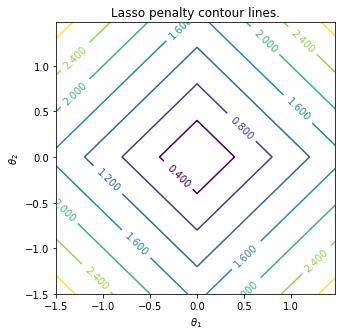

In [67]:
z_lasso = [abs(i) + abs(j) for i,j in zip(X,Y)]
cs = plt.contour(X, Y, z_lasso)
plt.clabel(cs)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title('Lasso penalty contour lines.')
plt.savefig('../05-linreg/img/lasso.png', dpi=300)

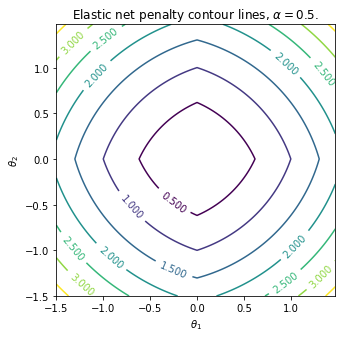

In [71]:
alpha = 0.5
z_elnet = [alpha*(i**2 + j**2) + (1-alpha)*(abs(i) + abs(j)) for i,j in zip(X,Y)]
cs = plt.contour(X, Y, z_elnet)
plt.clabel(cs)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title(r'Elastic net penalty contour lines, $\alpha = 0.5$.')
plt.savefig('../05-linreg/img/elnet.png', dpi=300)

# Classification

In [32]:
sigma = np.array([[0.5,0.2], [0.2,0.5]])*1.1
means = np.array([[2,1],[-1,1], [0,-2]])

In [33]:
from scipy.optimize import minimize_scalar

In [34]:
Sinv = np.linalg.inv(sigma)
def ne(X, mu):
    delta = X - mu
    return np.dot(np.dot(delta.T, Sinv), delta)

In [35]:
def b(x, i, j):
    def f(y):
        X = np.array([x, y])
        return (ne(X, means[i]) - ne(X, means[j]))**2
    return minimize_scalar(f).x

In [36]:
from itertools import combinations

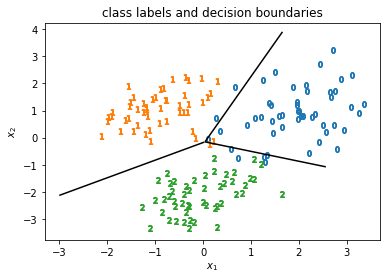

In [37]:
N = 50
for n, mu in enumerate(means):
    x, y = np.random.multivariate_normal(mu, sigma, N).T
    plt.scatter(x, y, marker='${}$'.format(n))
xs = np.arange(0.01, -3, -0.5)
plt.plot(xs, [b(x,1,2) for x in xs], color = 'black')
xs = np.arange(0.05, 1.7, 0.2)
plt.plot(xs, [b(x, 0, 1) for x in xs], color = 'black')
xs = np.arange(0.05, 3, 0.5)
plt.plot(xs, [b(x, 0, 2) for x in xs], color = 'black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('class labels and decision boundaries')
plt.savefig('../08-classification/img/linear_boundaries.png', dpi=300)

In [115]:
from scipy.stats import multivariate_normal

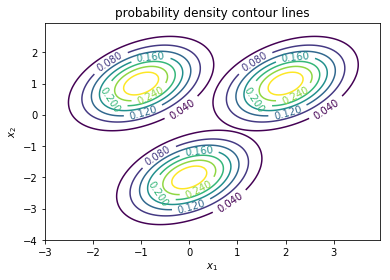

In [117]:
delta = 0.05
x = np.arange(-3, 4, delta)
y = np.arange(-4, 3, delta)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
for i in range(3):
    p = multivariate_normal(means[i], sigma)
    z = p.pdf(np.array(pos))
    cs = plt.contour(X, Y ,z)
    plt.clabel(cs)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('probability density contour lines')
plt.savefig('../08-classification/img/countour_lines.png', dpi=300)

In [3]:
sigma = np.array([[1, 0], [0, 1]])*0.05
means = [[-2, -1], [0, 0], [2, 1]]
N = 200
X = [np.random.multivariate_normal(mean, sigma, N) for mean in means]

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
models = []
for k in range(len(means)):
    y = []
    for l in range(len(means)):
        y += [l == k and 1 or 0]*N
    models.append(LinearRegression().fit(np.vstack(X), y))

In [6]:
def bl(x, i, j):
    def f(y):
        X = np.array([[x, y]])
        return (models[i].predict(X) - models[j].predict(X))**2
    return minimize_scalar(f).x

In [8]:
def classify(x):
    return np.argmax([model.predict(x) for model in models])

In [12]:
from matplotlib.markers import MarkerStyle

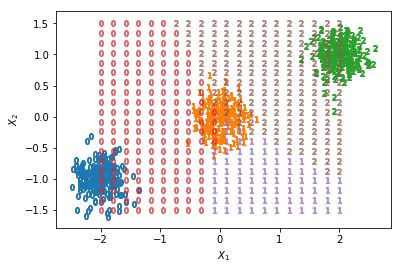

In [31]:
for n, vals in enumerate(X):
    x, y = vals.T
    plt.scatter(x, y, marker='${}$'.format(n))
n = 20
xs, ys = np.meshgrid(np.linspace(-2, 2, n), np.linspace(-1.5, 1.5, n))
xs, ys = xs.ravel(), ys.ravel()
labels = np.array([classify([[x ,y]]) for x,y in zip(xs, ys)])
for label in range(len(means)):
    plt.scatter(xs[labels == label], ys[labels == label], marker='${}$'.format(label), alpha=0.6)
#xs = np.arange(-0.35, 0.35, 0.01)
#plt.plot(xs, [bl(x, 0, 1) for x in xs], color='black')
#xs = np.arange(-1, 1.0, 0.01)
#plt.plot(xs, [bl(x, 1, 2) for x in xs], color='black')
#xs = np.arange(-0.65, 0.65, 0.01)
#plt.plot(xs, [bl(x, 0, 2) for x in xs], color='black')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.savefig('../08-classification/img/linear_model.png', dpi=300)

In [2]:
import pandas as pd

In [6]:
wine = pd.read_csv('data/winequality-red.csv', sep=';')

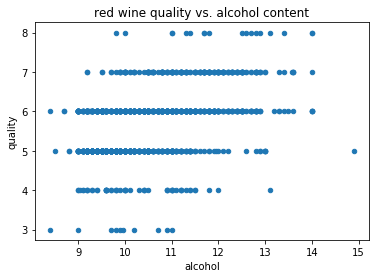

In [14]:
wine.plot.scatter('alcohol', 'quality')
plt.title('red wine quality vs. alcohol content')
plt.savefig('../08-classification/img/winequal.png', dpi=300)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [3]:
import numpy as np

In [93]:
X1, X2 = np.random.standard_normal(10), np.random.standard_normal(10) + 5

In [94]:
y1, y2 = np.zeros(10), np.zeros(10) + 1

In [95]:
lin_model = LinearRegression().fit(np.hstack((X1, X2)).reshape(-1,1), np.hstack((y1, y2)))

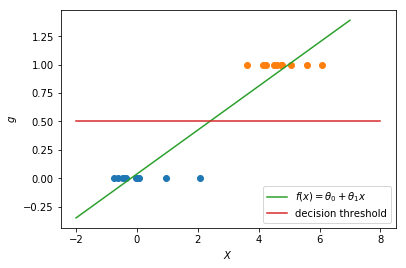

In [96]:
plt.plot(X1, y1, 'o')
plt.plot(X2, y2, 'o')
plt.plot(np.arange(-2, 8, 1), lin_model.predict(np.arange(-2, 8, 1).reshape(-1, 1)),
         label=r'$f(x) = \theta_0 + \theta_1x$')
plt.plot([-2, 8], [0.5, 0.5], label='decision threshold')
plt.xlabel('$X$')
plt.ylabel('$g$')
plt.legend(loc='lower right')
plt.savefig('../08-classification/img/lin_reg_class.png', dpi=300)

In [97]:
X2[-1] = 16

In [98]:
lin_model = LinearRegression().fit(np.hstack((X1, X2)).reshape(-1,1), np.hstack((y1, y2)))

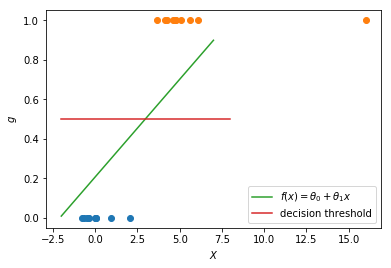

In [99]:
plt.plot(X1, y1, 'o')
plt.plot(X2, y2, 'o')
plt.plot(np.arange(-2, 8, 1), lin_model.predict(np.arange(-2, 8, 1).reshape(-1, 1)),
        label=r'$f(x) = \theta_0 + \theta_1x$')
plt.plot([-2, 8], [0.5, 0.5], label='decision threshold')
plt.xlabel('$X$')
plt.ylabel('$g$')
plt.legend(loc='lower right')
plt.savefig('../08-classification/img/lin_reg_class_outlier.png', dpi=300)

In [65]:
lr_model = LogisticRegression().fit(np.hstack((X1, X2)).reshape(-1,1), np.hstack((y1, y2)))

In [66]:
lr_model.coef_, lr_model.intercept_

(array([[ 1.21921655]]), array([-2.01886385]))

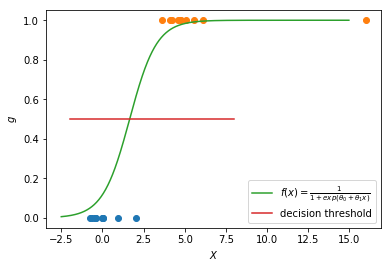

In [101]:
plt.plot(X1, y1, 'o')
plt.plot(X2, y2, 'o')
xs = np.arange(-2.5, 15, 0.02)
plt.plot(xs, lr_model.predict_proba(xs.reshape(-1, 1)).T[1],
        label=r'$f(x) = \frac{1}{1 + exp(\theta_0 + \theta_1 x)}$')
plt.plot([-2, 8], [0.5, 0.5], label='decision threshold')
plt.xlabel('$X$')
plt.ylabel('$g$')
plt.legend(loc='lower right')
plt.savefig('../08-classification/img/log_reg_class_outlier.png', dpi=300)

# Trees

In [4]:
import pandas as pd

In [5]:
data = pd.read_excel('data/CCPP/Folds5x2_pp.xlsx')

In [6]:
smoothed = data.groupby('V', as_index=False).mean()
smoothed = smoothed[smoothed.V > 30]

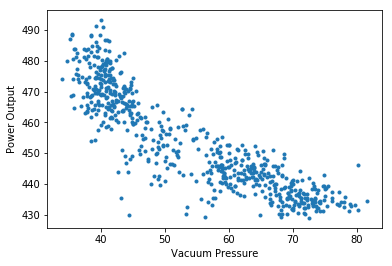

In [17]:
plt.plot(smoothed.V, smoothed.PE, '.')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [18]:
smoothed['Vsq'] = smoothed.V**2

In [19]:
lreg = LinearRegression().fit(smoothed[['V', 'Vsq']], smoothed.PE)

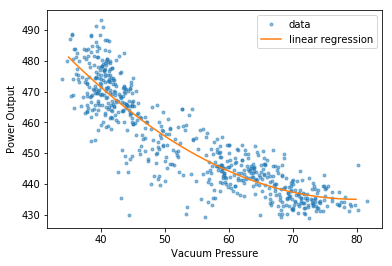

In [46]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, lreg.predict([(x, x**2) for x in xs]), label='linear regression')
#plt.plot(xs, tree.predict(xs.reshape(-1,1)), label='decision tree')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()
plt.savefig('../../Sparebank/talks/img/lr.png', dpi=300)

In [25]:
tree = DecisionTreeRegressor(max_depth=2).fit(smoothed[['V']], smoothed.PE)

In [47]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [46]:
dot = export_graphviz(tree, out_file=None, feature_names=['V'], rounded=True, filled=True, class_names=['PE'])

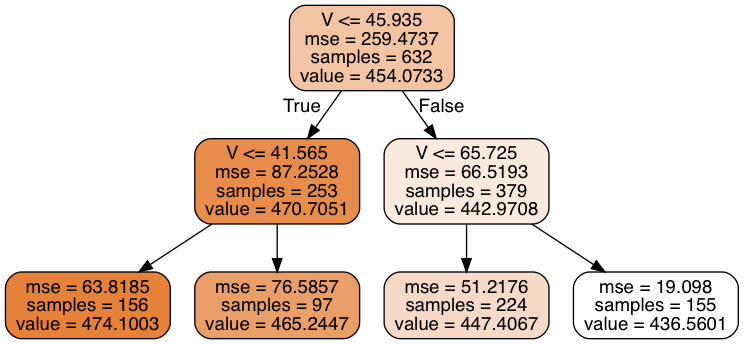

In [51]:
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

In [53]:
graph.write_png('../../Sparebank/talks/img/reg_tree.png')

True

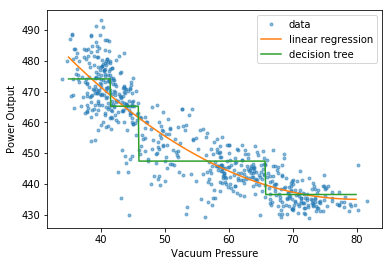

In [45]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, lreg.predict([(x, x**2) for x in xs]), label='linear regression')
plt.plot(xs, tree.predict(xs.reshape(-1,1)), label='decision tree')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()
plt.savefig('../../Sparebank/talks/img/lr_vs_tree.png', dpi=300)

In [111]:
deep_tree = DecisionTreeRegressor(max_depth=5).fit(smoothed[['V']], smoothed.PE)

In [112]:
shallow_tree = DecisionTreeRegressor(max_depth=1).fit(smoothed[['V']], smoothed.PE)

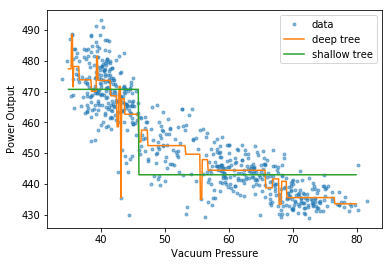

In [114]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, deep_tree.predict(xs.reshape(-1,1)), label='deep tree')
plt.plot(xs, shallow_tree.predict(xs.reshape(-1,1)), label='shallow tree')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()
plt.savefig('../../Sparebank/talks/img/tree_depth.png', dpi=300)

In [119]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(smoothed, test_size=0.2)
MSE_train, MSE_test = [], []
ds = range(1, 11)
for d in ds:
    model_d = DecisionTreeRegressor(max_depth=d).fit(train[['V']], train.PE)
    MSE_train.append(np.mean((model_d.predict(train[['V']]) - train.PE)**2))
    MSE_test.append(np.mean((model_d.predict(test[['V']]) - test.PE)**2))

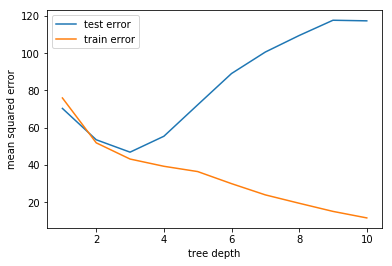

In [124]:
plt.plot(ds, MSE_test, label='test error')
plt.plot(ds, MSE_train, label='train error')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('mean squared error')
plt.savefig('../../Sparebank/talks/img/tree_depth_train_test.png', dpi=300)

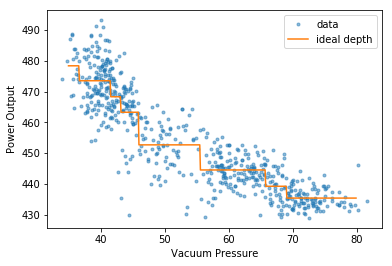

In [125]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, DecisionTreeRegressor(max_depth=3).fit(smoothed[['V']], smoothed.PE).predict(xs.reshape(-1,1)), label='ideal depth')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()
plt.savefig('../../Sparebank/talks/img/best_tree.png', dpi=300)

In [54]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')

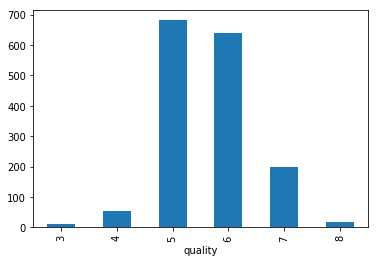

In [213]:
red_wine.groupby('quality').quality.count().plot.bar()
plt.savefig('../../Sparebank/talks/img/winequals_bar.png')

In [48]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


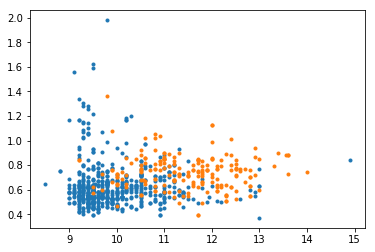

In [55]:
for qual, data in red_wine.groupby('quality'):
    if qual in [5,7]:
        plt.plot(data.alcohol, data.sulphates, '.')

In [56]:
wine_tree = DecisionTreeRegressor(max_depth=3).fit(red_wine[['alcohol','sulphates']], red_wine.quality)
xx, yy = np.meshgrid(np.arange(8,15,.05), np.arange(0.4,2,0.01))
X, Y = xx.ravel(), yy.ravel()
Z = wine_tree.predict(np.c_[X,Y]).reshape(xx.shape)

In [100]:
from pylab import get_cmap

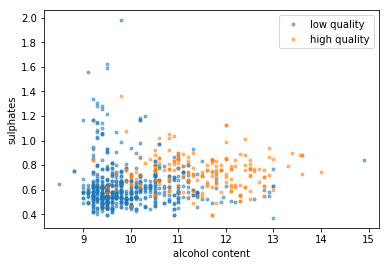

In [110]:
for qual, data in red_wine.groupby('quality'):
    if qual in [5,7]:
        plt.plot(data.alcohol, data.sulphates, '.', alpha=0.5, label={5: 'low quality',
                                                                      6: 'medium quality',
                                                                      7: 'high quality'}[qual])
#plt.contourf(xx, yy, Z, cmap=get_cmap('BuGn'), alpha=0.6)
plt.xlabel('alcohol content')
plt.ylabel('sulphates')
plt.legend()
plt.savefig('../../Sparebank/talks/img/winequal.png', dpi=300)

In [57]:
wine_dot = export_graphviz(wine_tree, out_file=None, rounded=True, filled=True, feature_names=['alcohol', 'sulphates'])

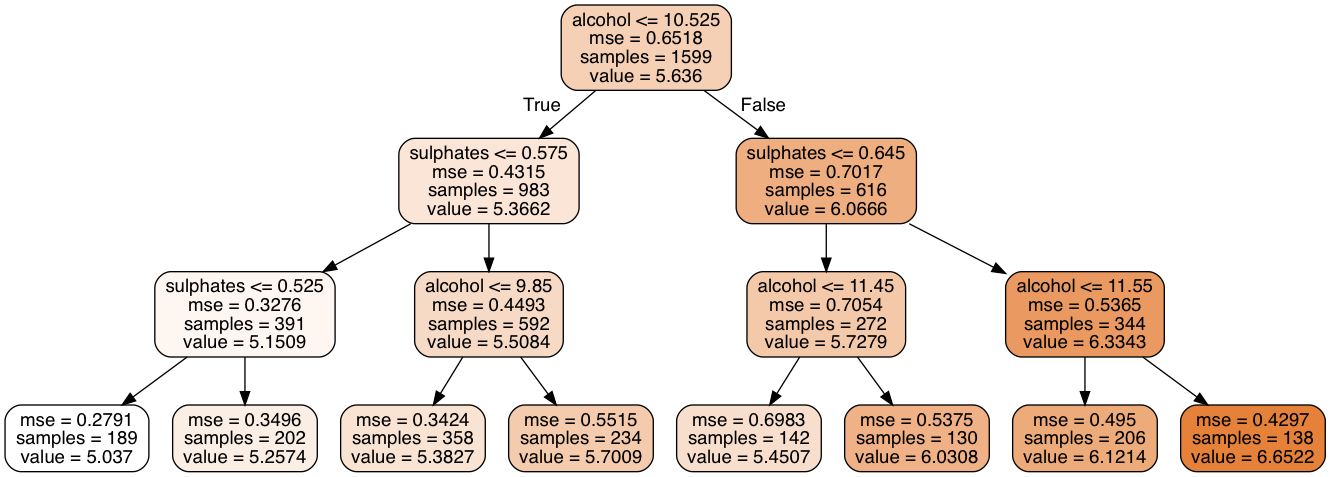

In [59]:
wine_graph = pydotplus.graph_from_dot_data(wine_dot)
Image(wine_graph.create_png())

In [60]:
wine_graph.write_png('../../Sparebank/talks/img/wine_tree.png')

True

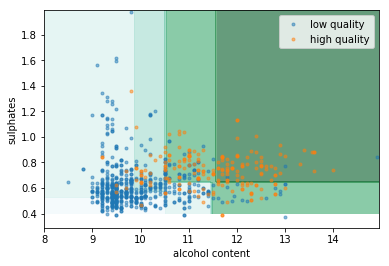

In [109]:
for qual, data in red_wine.groupby('quality'):
    if qual in [5,7]:
        plt.plot(data.alcohol, data.sulphates, '.', alpha=0.5, label={5: 'low quality', 7: 'high quality'}[qual])
plt.contourf(xx, yy, Z, cmap=get_cmap('BuGn'), alpha=0.6)
plt.xlabel('alcohol content')
plt.ylabel('sulphates')
plt.legend()
plt.savefig('../../Sparebank/talks/img/winequal_tree.png', dpi=300)

In [62]:
wine_vars = list(red_wine.columns)

In [63]:
wine_vars.remove('quality')

In [129]:
from sklearn.tree import DecisionTreeClassifier

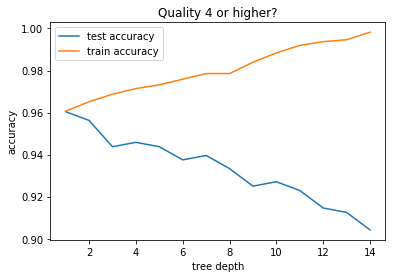

In [224]:
Xtr, Xte, ytr, yte = train_test_split(red_wine[wine_vars], red_wine.quality > 4, test_size=0.3)
hr_train, hr_test = [], []
ds = range(1, 15)
for d in ds:
    model_d = DecisionTreeClassifier(max_depth=d).fit(Xtr, ytr)
    hr_train.append(np.mean(model_d.predict(Xtr) == ytr))
    hr_test.append(np.mean(model_d.predict(Xte) == yte))
plt.plot(ds, hr_test, label='test accuracy')
plt.plot(ds, hr_train, label='train accuracy')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.title('Quality 4 or higher?')
plt.savefig('../../Sparebank/talks/img/tree_depth_train_test_wine_bad.png', dpi=300)

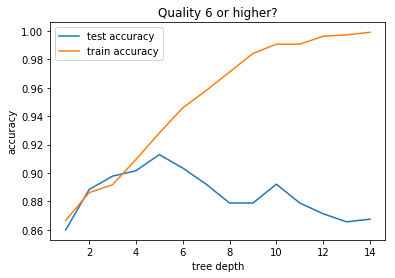

In [228]:
Xtr, Xte, ytr, yte = train_test_split(red_wine[wine_vars], red_wine.quality > 6, test_size=0.33)
hr_train, hr_test = [], []
ds = range(1, 15)
for d in ds:
    model_d = DecisionTreeClassifier(max_depth=d).fit(Xtr, ytr)
    hr_train.append(np.mean(model_d.predict(Xtr) == ytr))
    hr_test.append(np.mean(model_d.predict(Xte) == yte))
plt.plot(ds, hr_test, label='test accuracy')
plt.plot(ds, hr_train, label='train accuracy')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.title('Quality 6 or higher?')
plt.savefig('../../Sparebank/talks/img/tree_depth_train_test_wine_great.png', dpi=300)

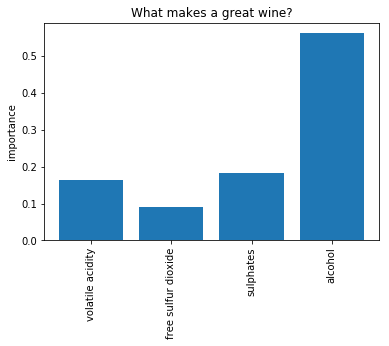

In [229]:
dt = DecisionTreeClassifier(max_depth=3).fit(Xtr, ytr)
relevant = dt.feature_importances_ > 0
labels = np.array(wine_vars)[relevant]
plt.bar(range(len(labels)), dt.feature_importances_[relevant])
plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.ylabel('importance')
plt.title('What makes a great wine?')
plt.savefig('../../Sparebank/talks/img/wine_importance.png', dpi=300, bbox_inches='tight')

In [216]:
wine_vars, dt.feature_importances_

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 array([ 0.        ,  0.11237654,  0.        ,  0.        ,  0.        ,
         0.04160929,  0.05645671,  0.        ,  0.        ,  0.18890718,
         0.60065028]))

In [162]:
dtm = DecisionTreeClassifier(max_depth=2).fit(Xtr, ytr)

In [163]:
for qual in sorted(yte.unique()):
    hr = np.mean(dtm.predict(Xte[yte == qual]) == yte[yte==qual])
    perc = sum(yte==qual) / float(len(yte))
    print qual, " ".join("{:4.2f}".format(i) for i in (hr, perc))

3 0.00 0.01
4 0.00 0.04
5 0.74 0.45
6 0.58 0.38
7 0.00 0.12
8 0.00 0.00


In [167]:
dtm = DecisionTreeClassifier(max_depth=6).fit(Xtr, ytr)
for qual in sorted(yte.unique()):
    hr = np.mean(dtm.predict(Xte[yte == qual]) == yte[yte==qual])
    perc = sum(yte==qual) / float(len(yte))
    print qual, " ".join("{:4.2f}".format(i) for i in (hr, perc))

3 0.25 0.01
4 0.00 0.04
5 0.59 0.45
6 0.64 0.38
7 0.52 0.12
8 0.00 0.00


In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rf = RandomForestClassifier().fit(Xtr, ytr > 5)

In [173]:
from sklearn.metrics import roc_curve

In [180]:
fpr, tpr, thresholds = roc_curve(yte > 5, rf.predict_proba(Xte)[:,1], drop_intermediate=False)

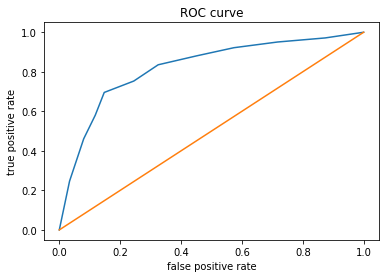

In [184]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.savefig('../../Sparebank/talks/img/ROC.png', dpi=300)

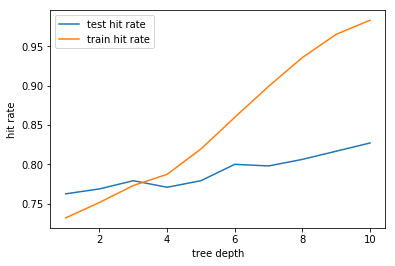

In [190]:
Xtr, Xte, ytr, yte = train_test_split(red_wine[wine_vars], red_wine.quality > 5, test_size=0.3)
hr_train, hr_test = [], []
ds = range(1, 11)
for d in ds:
    model_d = RandomForestClassifier(max_depth=d,n_estimators=50).fit(Xtr, ytr)
    hr_train.append(np.mean(model_d.predict(Xtr) == ytr))
    hr_test.append(np.mean(model_d.predict(Xte) == yte))
plt.plot(ds, hr_test, label='test hit rate')
plt.plot(ds, hr_train, label='train hit rate')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('hit rate')
#plt.savefig('../../Sparebank/talks/img/forest_depth_train_test_wine.png', dpi=300)

# Anomalies

In [33]:
xs = np.random.standard_normal(10)

In [36]:
xs[5] = 4.2

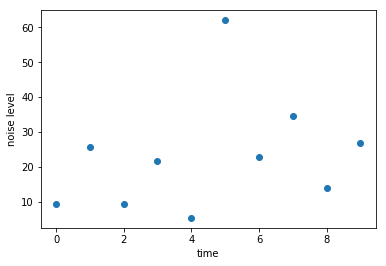

In [41]:
plt.plot((xs+2)*10, 'o')
plt.ylabel('noise level')
plt.xlabel('time')
plt.savefig('../../Sparebank/talks/img/noise_anomaly.png', dpi=300)

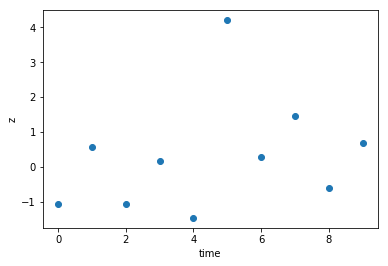

In [42]:
plt.plot(xs, 'o')
plt.ylabel('z')
plt.xlabel('time')
plt.savefig('../../Sparebank/talks/img/noise_anomaly_z.png', dpi=300)

In [43]:
from scipy.stats import norm

In [46]:
norm().pdf(0.5)

0.35206532676429952

In [53]:
?plt.xlabel

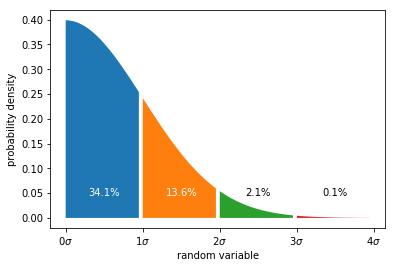

In [78]:
xs = np.arange(0,1,0.05)
plt.fill_between(xs, np.zeros_like(xs), norm().pdf(xs))
xs = np.arange(1,2,0.05)
plt.fill_between(xs, np.zeros_like(xs), norm().pdf(xs))
xs = np.arange(2,3,0.05)
plt.fill_between(xs, np.zeros_like(xs), norm().pdf(xs))
xs = np.arange(3,4,0.05)
plt.fill_between(xs, np.zeros_like(xs), norm().pdf(xs))
plt.xticks(range(5), [r'${}\sigma$'.format(i) for i in range(5)])
plt.text(0.5, 0.05, '34.1%',  horizontalalignment='center', verticalalignment='center', color='white')
plt.text(1.5, 0.05, '13.6%',  horizontalalignment='center', verticalalignment='center', color='white')
plt.text(2.5, 0.05, '2.1%',  horizontalalignment='center', verticalalignment='center')
plt.text(3.5, 0.05, '0.1%',  horizontalalignment='center', verticalalignment='center')
#plt.text(1,1, u'\u00A9 Dirk Hesse, iKnow Solutions',
#         size=8,
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=plt.gca().transAxes)
plt.ylabel('probability density')
plt.xlabel('random variable')
plt.savefig('../../Sparebank/talks/img/normal_dist.png', dpi=300)

# Clustering

In [87]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

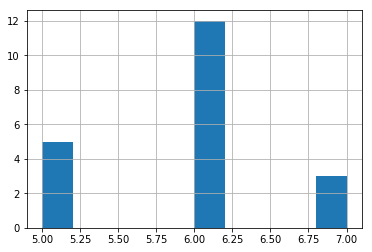

In [154]:
data_sample = red_wine.sample(20)
Z = linkage(data_sample[wine_vars])
data_sample.quality.hist()

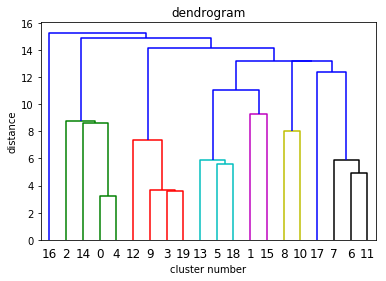

In [160]:
dendrogram(Z)
plt.xlabel('cluster number')
plt.ylabel('distance')
plt.title('dendrogram')
plt.savefig('../../Sparebank/talks/img/dendrogram.png', dpi=300)

In [156]:
data_sample['labels'] = fcluster(Z, 4, criterion='maxclust')

In [157]:
data_sample.groupby('labels').quality.mean()

labels
1    6.000000
2    6.250000
3    5.727273
4    6.000000
Name: quality, dtype: float64

In [161]:
from sklearn.cluster import KMeans

In [165]:
model = KMeans(3).fit(red_wine[wine_vars])

In [166]:
?model.score

In [169]:
ks = range(2, 11)
ds = [-KMeans(k).fit(red_wine[wine_vars]).score(red_wine[wine_vars]) for k in ks]

In [171]:
ks.insert(0, 1)

In [175]:
X = red_wine[wine_vars].values

In [182]:
mu = np.mean(X, axis=0).shape

In [185]:
ds.insert(0, np.sum((X - mu)**2))

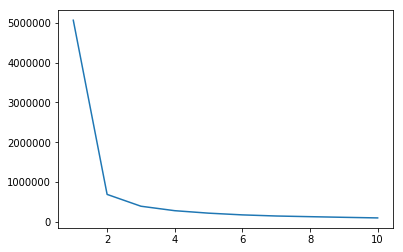

In [186]:
plt.plot(ks, ds)

In [187]:
from sklearn.datasets import load_iris

In [189]:
iris = load_iris()

In [191]:
X = iris['data']

In [203]:
ks = range(2,10)
costs = [-KMeans(k).fit(X).score(X) for k in ks]

In [198]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

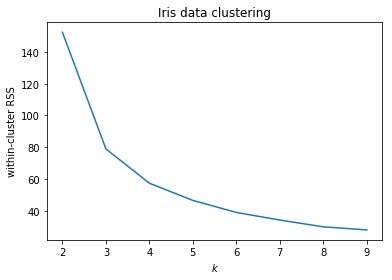

In [250]:
plt.plot(ks, costs)
plt.xlabel('$k$')
plt.ylabel('within-cluster RSS')
plt.title('Iris data clustering')
plt.savefig('../../Sparebank/talks/img/choosing_k.png', dpi=300)

In [211]:
labels = KMeans(3).fit(X).predict(X)

In [229]:
actuals = iris['target']

In [223]:
pred = pd.DataFrame({'prediction': labels, 'actual': actuals})

In [245]:
d = pred.groupby(['prediction', 'actual']).count().reset_index()

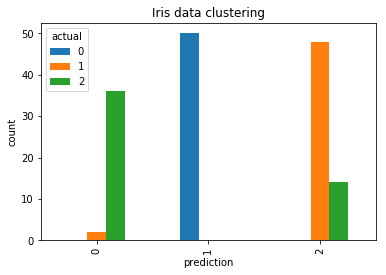

In [251]:
d.pivot_table(columns='actual', values='count', index='prediction').plot.bar()
plt.ylabel('count')
plt.title('Iris data clustering')
plt.savefig('../../Sparebank/talks/img/iris_bars.png', dpi=300)

# Trees - STK-INF4000

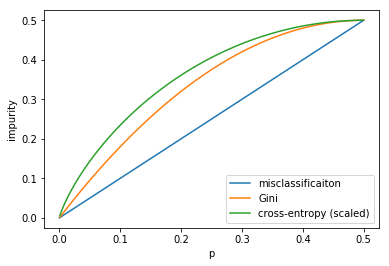

In [19]:
xs = np.arange(0.001, 0.501, 0.001)
plt.plot([0,0.5], [0,0.5], label='misclassificaiton')
plt.plot(xs, [2*x * (1-x) for x in xs], label='Gini')
ce = np.array([-x*np.log(x) - (1-x)*np.log(1-x) for x in xs])
ce /= ce[-1] / 0.5
plt.plot(xs, ce, label='cross-entropy (scaled)')
plt.legend(loc='lower right')
plt.xlabel('p')
plt.ylabel('impurity')
plt.savefig('../10-Trees/img/impurity.png', dpi=300)

In [139]:
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split

In [100]:
X, y = make_hastie_10_2()

In [105]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=10000)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
ds = range(2, 40)
tscores = []
for d in ds:
    #tscores.append(cross_val_score(DecisionTreeClassifier(max_depth=d), X, y, cv=10))
    tscores.append(DecisionTreeClassifier(max_depth=d).fit(Xtr, ytr).score(Xte, yte))

In [137]:
?DecisionTreeClassifier

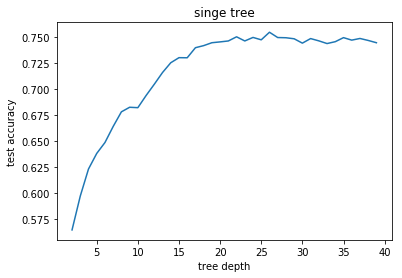

In [138]:
#plt.errorbar(ds, [s.mean() for s in tscores], [s.std() for s in tscores], fmt='o')
plt.plot(ds, tscores)
plt.xlabel('tree depth')
plt.ylabel('test accuracy')
plt.title('singe tree')
plt.savefig('../10-Trees/img/single_tree_hastie.png', dpi=300)

In [114]:
Ms = range(1, 200, 2)
bscores = []
for M in Ms:
    if M % 10 == 1:
        print M
    bscores.append(AdaBoostClassifier(n_estimators=M).fit(Xtr, ytr).score(Xte, yte))
    #bscores.append(cross_val_score(AdaBoostClassifier(n_estimators=M, learning_rate=0.3), X, y, cv=10))

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191


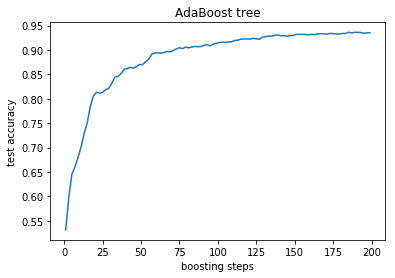

In [133]:
#plt.errorbar(Ms, [s.mean() for s in bscores], [s.std() for s in bscores], fmt='o')
plt.plot(Ms, bscores)
plt.xlabel('boosting steps')
plt.ylabel('test accuracy')
plt.title('AdaBoost tree')
plt.savefig('../10-Trees/img/adaboost_hastie.png', dpi=300)

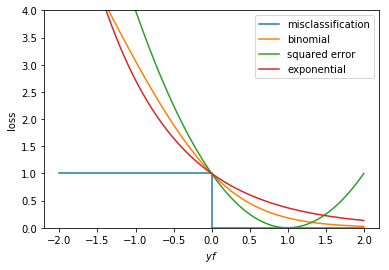

In [157]:
plt.plot([-2, -1e-10, 1e-10, 2], [1, 1, 0, 0], label='misclassification')
eps = 0.05
xs = np.arange(-2, 2+eps, eps)
fns = {'exponential': lambda x: np.exp(-x),
       'binomial': lambda x: np.log(1 + np.exp(-2*x)),
       'squared error': lambda x: (x - 1)**2}
for name in fns:
    ys = fns[name](xs)
    ys /= ys[xs.searchsorted(0)]
    plt.plot(xs, ys, label=name)
plt.legend()
plt.ylim((0, 4))
plt.xlabel('$yf$')
plt.ylabel('loss')
plt.savefig('../10-Trees/img/loss_classification.png', dpi=300)